In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("C:/Users/user/Desktop/Research/highTea2.csv")

In [6]:
df.head()

,Date,Price,Dollar rate,Crude oil,Production
0,1/1/2020,535.86,181.43,11181.53,5084836
1,1/2/2020,577.70,181.58,9687.29,4452424
2,1/3/2020,560.10,184.81,5950.88,3355617
3,1/4/2020,655.92,191.67,4032.73,4011551
4,1/5/2020,645.41,187.38,5636.39,6713225


In [7]:
df1=df.reset_index()['Price']

In [8]:
df1

0      535.86
1      577.70
2      560.10
3      655.92
4      645.41
        ...  
103    421.06
104    417.31
105    420.43
106    425.99
107    440.84
Name: Price, Length: 108, dtype: float64

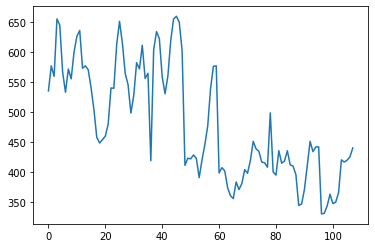

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:

import numpy as np

In [11]:
df1

0      535.86
1      577.70
2      560.10
3      655.92
4      645.41
        ...  
103    421.06
104    417.31
105    420.43
106    425.99
107    440.84
Name: Price, Length: 108, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:

print(df1)

[[0.62206373]
 [0.74904401]
 [0.69562974]
 [0.98643399]
 [0.95453718]
 [0.7169044 ]
 [0.61544765]
 [0.73289833]
 [0.68312595]
 [0.81793627]
 [0.89793627]
 [0.92828528]
 [0.7369651 ]
 [0.74904401]
 [0.72889226]
 [0.63757208]
 [0.52764795]
 [0.38743551]
 [0.35875569]
 [0.3753566 ]
 [0.39350531]
 [0.45323217]
 [0.63708649]
 [0.63550835]
 [0.85705615]
 [0.97432473]
 [0.86388467]
 [0.71050076]
 [0.65347496]
 [0.51010622]
 [0.59924127]
 [0.76509863]
 [0.73359636]
 [0.85326252]
 [0.68546282]
 [0.71144158]
 [0.26907436]
 [0.83019727]
 [0.92245827]
 [0.88673748]
 [0.69359636]
 [0.6076176 ]
 [0.69790592]
 [0.87742033]
 [0.98588771]
 [1.        ]
 [0.96965099]
 [0.82549317]
 [0.24555387]
 [0.28191199]
 [0.27827011]
 [0.29796662]
 [0.28118361]
 [0.18342944]
 [0.27353566]
 [0.35141123]
 [0.44418816]
 [0.63350531]
 [0.74646434]
 [0.74898331]
 [0.20728376]
 [0.23408194]
 [0.21717754]
 [0.13259484]
 [0.09229135]
 [0.07742033]
 [0.1616692 ]
 [0.12324734]
 [0.15329287]
 [0.22409712]
 [0.20588771]
 [0.27

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:

training_size,test_size

(70, 38)

In [16]:
train_data

array([[0.62206373],
       [0.74904401],
       [0.69562974],
       [0.98643399],
       [0.95453718],
       [0.7169044 ],
       [0.61544765],
       [0.73289833],
       [0.68312595],
       [0.81793627],
       [0.89793627],
       [0.92828528],
       [0.7369651 ],
       [0.74904401],
       [0.72889226],
       [0.63757208],
       [0.52764795],
       [0.38743551],
       [0.35875569],
       [0.3753566 ],
       [0.39350531],
       [0.45323217],
       [0.63708649],
       [0.63550835],
       [0.85705615],
       [0.97432473],
       [0.86388467],
       [0.71050076],
       [0.65347496],
       [0.51010622],
       [0.59924127],
       [0.76509863],
       [0.73359636],
       [0.85326252],
       [0.68546282],
       [0.71144158],
       [0.26907436],
       [0.83019727],
       [0.92245827],
       [0.88673748],
       [0.69359636],
       [0.6076176 ],
       [0.69790592],
       [0.87742033],
       [0.98588771],
       [1.        ],
       [0.96965099],
       [0.825

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 6
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(63, 6)
(63,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(31, 6)
(31,)


(None, None)

In [21]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(6,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')
from keras.layers import Dropout
n_input = 12
n_features = 1
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [26]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
63/63 [==============================] - 3s 15ms/step - loss: 0.0824 - val_loss: 0.0211
Epoch 2/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0640 - val_loss: 0.0395
Epoch 3/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0502 - val_loss: 0.0222
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0549 - val_loss: 0.0172
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0514 - val_loss: 0.0185
Epoch 6/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0490 - val_loss: 0.0235
Epoch 7/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0419 - val_loss: 0.0251
Epoch 8/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.0313
Epoch 9/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0433 - val_loss: 0.0351
Epoch 10/100
63/63 [==============================] - 0s 7ms/step - loss: 0.0403 - val_loss: 0.0304
Epoch 11

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.6.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

512.8156298325945

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

422.29896878397454

array([0.25875569, 0.23602428, 0.51098634, 0.21229135, 0.19641882,
       0.31960546, 0.25669196, 0.2676783 , 0.31957511, 0.24795144,
       0.24215478, 0.19918058, 0.04276176, 0.05019727, 0.12373293,
       0.24500759, 0.36707132, 0.31505311, 0.33875569, 0.33942337,
       0.        , 0.00312595, 0.04121396, 0.09969651, 0.0524431 ,
       0.05930197, 0.10734446, 0.27365706, 0.26227618, 0.27174507,
       0.28861912])

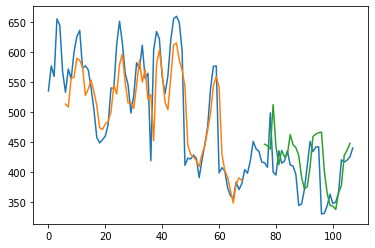

In [33]:
look_back=6
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

38

In [56]:
train_predict.shape

(63, 1)

In [36]:
x_input=test_data[32:].reshape(1,-1)
x_input.shape

(1, 6)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:

temp_input

[0.10734446130500763,
 0.27365705614567526,
 0.26227617602427933,
 0.2717450682852809,
 0.2886191198786041,
 0.3336874051593324,
 0.42007380723953247,
 0.42007380723953247,
 0.42007380723953247,
 0.42007380723953247,
 0.42007380723953247,
 0.42007380723953247,
 0.42007380723953247]

In [47]:
from numpy import array

lst_output=[]
n_steps=6
i=0
while(i<3):
    
    if(len(temp_input)>6):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.27365706 0.26227618 0.27174507 0.28861912 0.33368741 0.42007381
 0.42007381 0.42007381 0.42007381 0.42007381 0.42007381 0.42007381]


ValueError: cannot reshape array of size 12 into shape (1,6,1)

In [48]:
day_new=np.arange(1,16)
day_pred=np.arange(16,18)


In [48]:
trainScore = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print(trainY[0])
print(trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testY[0])
print(testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

TypeError: Singleton array 0.6154476479514415 cannot be considered a valid collection.

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)


108

ValueError: x and y must have same first dimension, but have shapes (15,) and (98, 1)

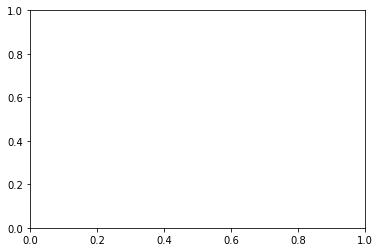

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[10:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)
